# Long Term Open Source Metric Analysis

# Hadoop Analysis

In [342]:

neededColumnsClass =['cbo','cboModified','fanin','fanout','wmc','dit','noc','lcom',
                     'lcom*','tcc','lcc', 'loc'
               ]

hadoop_versions = [
         "2.9.2", "2.9.1", "2.9.0","2.8.5", "2.8.4", "2.8.3","2.8.2", "2.8.1","2.8.0",
        "2.7.7","2.7.6","2.7.5","2.7.3","2.7.2","2.7.1","2.7.0","2.6.5", "2.6.4","2.6.3"
        ,"2.6.2","2.6.1","2.6.0","2.5.2","2.5.1","2.5.0","2.4.1","2.4.0","2.3.0"
        ,"3.3.0", "3.3.1", "3.3.2", "3.3.3", "3.3.4", "3.3.5","3.3.6"
       ,"3.2.0", "3.3.1", "3.2.2", "3.2.3", "3.2.4"
       ,"3.1.0","3.1.1","3.1.2","3.1.3","3.1.4"
       ,"3.0.0","3.0.1","3.0.2","3.0.3"
    ]


swt_versions = ["2.1", "3.0", "3.1","3.2", "3.3", "3.4","3.5", "3.6","3.7","3.8","4.2","4.3","4.4","4.5",
                  "4.6","4.7","4.8", "4.9"
            ]

kafka_versions = ["3.4.1","3.4.0","3.3.2","3.3.1",
                "3.2.3","3.2.1","3.2.0","3.1.2","3.1.1","3.1.0","3.0.2","3.0.1","3.0.0",
                "2.8.2","2.8.1","2.8.0","2.7.2","2.7.1","2.7.0","2.6.3","2.6.2","2.6.1",
                "2.6.0","2.5.1","2.5.0","2.4.1","2.4.0","2.3.1","2.3.0",
                "2.2.2","2.2.1","2.2.0","2.1.1","2.1.0","2.0.1","2.0.0","1.1.1","1.1.0",
                "1.0.2","1.0.1","1.0.0","0.11.0.3","0.11.0.2","0.11.0.1","0.11.0.0",
                "0.10.2.2","0.10.2.1","0.10.2.0","0.10.1.1","0.10.1.0","0.10.0.0",
                "0.9.0.1","0.9.0.0","0.8.2.2","0.8.2.1","0.8.2.0","0.8.1.9",
                "0.8.1.1","0.8.1","0.8.0","0.7.9"
            ]
selectedColumns =['cbo','cboModified','fanin','fanout','wmc','dit','noc','lcom',
                     'lcom*','tcc','lcc', 'loc', 'count'
               ]

In [343]:
len(hadoop_versions)

49

In [344]:
import pandas as pd

hadoopclassCkMetricsAllVersionsDfClass = pd.read_csv('DataSource/hadoop_AllCkMetricsAllVersionsClass.csv').dropna()

swtclassCkMetricsAllVersionsDfClass = pd.read_csv('DataSource/swt_AllCkMetricsAllVersionsClass.csv').dropna()

kafkaclassCkMetricsAllVersionsDfClass = pd.read_csv('DataSource/kafka_AllCkMetricsAllVersionsClass.csv').dropna()

In [345]:
hadoopBugsAllDf = pd.read_csv('DataSource/hadoop_bugs_all.csv').dropna()
hadoopNewFeaturesAllDf = pd.read_csv('DataSource/hadoop_newFeature_all.csv').dropna()
hadoopImprovementsAllDf = pd.read_csv('DataSource/hadoop_improvements_all.csv').dropna()

swt_bugsDf = pd.read_csv('DataSource/swt_bugs_all.csv').dropna()
kafka_bugsNewFeatureImprovementsDf = pd.read_csv('DataSource/kafka_bugsNewFeatureImprovements.csv').dropna()

In [346]:
cleanedCkMetricsAllVersionsDf = (hadoopclassCkMetricsAllVersionsDfClass
    .loc[~hadoopclassCkMetricsAllVersionsDfClass['class'].str.contains("Test")]
    .loc[~hadoopclassCkMetricsAllVersionsDfClass['class'].str.contains("test")]
    .loc[~hadoopclassCkMetricsAllVersionsDfClass['class'].str.contains("TEST")]
    .loc[~hadoopclassCkMetricsAllVersionsDfClass['file'].str.contains("src/test/")]
) 
meanCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].mean()
stdCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].std()
maxCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].max()
locVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)['loc'].sum()

hadoopBugsGroupedDf.head()

hadoopBugsGroupedDf = hadoopBugsAllDf.groupby(['AVersion']).count().reset_index()
hadoopImprovementsGroupedDf= hadoopImprovementsAllDf.groupby(['Fix Version/s']).count().reset_index()
hadoopNewFeaturesGroupedDf= hadoopNewFeaturesAllDf.groupby(['Fix Version/s']).count().reset_index()

hadoopBugsGroupedDf = hadoopBugsGroupedDf.rename(columns = {'AVersion': 'Version','Issue key': 'count'})[['Version','count']]
hadoopImprovementsGroupedDf = hadoopImprovementsGroupedDf.rename(columns = {'Fix Version/s': 'Version','Issue key': 'count'})[['Version','count']]
hadoopNewFeaturesGroupedDf = hadoopNewFeaturesGroupedDf.rename(columns = {'Fix Version/s': 'Version','Issue key': 'count'})[['Version','count']]

locVersions = pd.merge(locVersions, hadoopBugsGroupedDf,on="Version", how='inner')

meanCkGroupedVersions['numericVersion'] = meanCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))
stdCkGroupedVersions['numericVersion'] = stdCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))
maxCkGroupedVersions['numericVersion'] = maxCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))

locVersions['numericVersion'] = locVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))
mergedMeanBugCountsDf = pd.merge(meanCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')
mergedStdBugCountsDf = pd.merge(stdCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')
mergedMaxBugCountsDf = pd.merge(maxCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')

mergedMeanNewFeatureCountsDf = pd.merge(meanCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')
mergedStdNewFeatureCountsDf = pd.merge(stdCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')
mergedMaxNewFeatureCountsDf = pd.merge(maxCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')

mergedMeanImprovementCountsDf = pd.merge(meanCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')
mergedStdImprovementCountsDf = pd.merge(stdCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')
mergedMaxImprovementCountsDf = pd.merge(maxCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')

hadoopDf = mergedMeanBugCountsDf[selectedColumns]
hadoopDf.head()

,cbo,cboModified,fanin,fanout,wmc,dit,noc,lcom,lcom*,tcc,lcc,loc,count
0,7.932503,12.041066,4.108563,7.932503,16.942114,1.801879,0.279161,116.824377,0.365504,0.237157,0.311295,83.981433,6
1,8.086595,12.173189,4.086595,8.086595,17.227519,1.791424,0.287677,117.751457,0.366965,0.238613,0.313661,84.773314,6
2,8.083437,12.168539,4.085102,8.083437,17.239908,1.791511,0.288181,117.979193,0.366976,0.238425,0.313519,84.827507,10
3,8.116883,12.220982,4.104099,8.116883,17.320414,1.809456,0.287744,119.846591,0.367557,0.239146,0.314511,85.182021,5
4,8.116883,12.216924,4.100041,8.116883,17.320820,1.809456,0.287744,119.846591,0.367557,0.239146,0.314511,85.182630,2


In [347]:
swtcleanedCkMetricsAllVersionsDf = (swtclassCkMetricsAllVersionsDfClass
    .loc[~swtclassCkMetricsAllVersionsDfClass['class'].str.contains("Test")]
    .loc[~swtclassCkMetricsAllVersionsDfClass['class'].str.contains("test")]
    .loc[~swtclassCkMetricsAllVersionsDfClass['class'].str.contains("TEST")]
    .loc[~swtclassCkMetricsAllVersionsDfClass['file'].str.contains("src/test/")]
) 

meanCkGroupedVersions = swtcleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].mean()
stdCkGroupedVersions = swtcleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].std()
maxCkGroupedVersions = swtcleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].max()
locVersions = swtcleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)['loc'].sum()
bugsGroupedDf = swt_bugsDf.groupby(['Version']).count().reset_index()

locVersions['Version'] = locVersions['Version'].astype(str)
swt_bugsDf['Version'] = swt_bugsDf['Version'].astype(str)
locVersions = pd.merge(locVersions, bugsGroupedDf,on="Version", how='inner')
swt_bugsGroupedDf= swt_bugsDf[swt_bugsDf['Version'].isin(swt_versions)].groupby("Version", as_index=False).count().rename(columns = {'Bug ID': 'count'})[['Version','count']]
swt_bugsGroupedDf['Version'] = swt_bugsGroupedDf['Version'].astype(float)

mergedMeanCountsDf = pd.merge(meanCkGroupedVersions, swt_bugsGroupedDf, on="Version", how='inner')
mergedStdCountsDf = pd.merge(stdCkGroupedVersions, swt_bugsGroupedDf, on="Version", how='inner')
mergedMaxCountsDf = pd.merge(maxCkGroupedVersions, swt_bugsGroupedDf, on="Version", how='inner')

swtDf = mergedMeanCountsDf[selectedColumns]
swtDf.head()

,cbo,cboModified,fanin,fanout,wmc,dit,noc,lcom,lcom*,tcc,lcc,loc,count
0,8.845878,15.777778,6.931900,8.845878,63.197133,1.921147,0.541219,939.186380,0.414388,0.200357,0.259863,211.469534,16
1,8.329073,16.734824,6.939297,9.795527,66.233227,1.722045,0.929712,1035.693291,0.393998,0.206552,0.268714,215.313099,7
2,8.730769,17.523669,7.029586,10.494083,72.565089,1.810651,1.316568,1215.399408,0.408199,0.196216,0.254862,231.863905,9
3,9.089136,18.245125,7.317549,10.927577,79.025070,1.885794,1.743733,1297.030641,0.412549,0.186567,0.245245,248.835655,3
4,8.086873,16.581081,6.602317,9.978764,66.216216,1.849421,1.714286,1323.770270,0.437889,0.151724,0.197347,213.658301,2


In [348]:
kafkaclassCkMetricsAllVersionsDfClass = (kafkaclassCkMetricsAllVersionsDfClass
    .loc[~kafkaclassCkMetricsAllVersionsDfClass['class'].str.contains("Test")]
    .loc[~kafkaclassCkMetricsAllVersionsDfClass['class'].str.contains("test")]
    .loc[~kafkaclassCkMetricsAllVersionsDfClass['class'].str.contains("TEST")]
    .loc[~kafkaclassCkMetricsAllVersionsDfClass['file'].str.contains("src/test/")]
) 

meanCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].mean()
stdCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].std()
maxCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].max()

mergedMeanCountsDf = pd.merge(meanCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')
mergedStdCountsDf = pd.merge(stdCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')
mergedMaxCountsDf = pd.merge(maxCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')

mergedMeanCountsDf = mergedMeanCountsDf.rename(columns={'ExistingBug': 'count'})
kafkaDf = mergedMeanCountsDf[selectedColumns]
kafkaDf.head()


,cbo,cboModified,fanin,fanout,wmc,dit,noc,lcom,lcom*,tcc,lcc,loc,count
0,7.932503,12.041066,4.108563,7.932503,16.942114,1.801879,0.279161,116.824377,0.365504,0.237157,0.311295,83.981433,44
1,8.086595,12.173189,4.086595,8.086595,17.227519,1.791424,0.287677,117.751457,0.366965,0.238613,0.313661,84.773314,35
2,8.083437,12.168539,4.085102,8.083437,17.239908,1.791511,0.288181,117.979193,0.366976,0.238425,0.313519,84.827507,92
3,8.116883,12.220982,4.104099,8.116883,17.320414,1.809456,0.287744,119.846591,0.367557,0.239146,0.314511,85.182021,62
4,8.116883,12.216924,4.100041,8.116883,17.320820,1.809456,0.287744,119.846591,0.367557,0.239146,0.314511,85.182630,175


In [349]:
df = pd.concat([hadoopDf,swtDf,kafkaDf], ignore_index=True)
df.head()

,cbo,cboModified,fanin,fanout,wmc,dit,noc,lcom,lcom*,tcc,lcc,loc,count
0,7.932503,12.041066,4.108563,7.932503,16.942114,1.801879,0.279161,116.824377,0.365504,0.237157,0.311295,83.981433,6
1,8.086595,12.173189,4.086595,8.086595,17.227519,1.791424,0.287677,117.751457,0.366965,0.238613,0.313661,84.773314,6
2,8.083437,12.168539,4.085102,8.083437,17.239908,1.791511,0.288181,117.979193,0.366976,0.238425,0.313519,84.827507,10
3,8.116883,12.220982,4.104099,8.116883,17.320414,1.809456,0.287744,119.846591,0.367557,0.239146,0.314511,85.182021,5
4,8.116883,12.216924,4.100041,8.116883,17.320820,1.809456,0.287744,119.846591,0.367557,0.239146,0.314511,85.182630,2


In [350]:
from sklearn.model_selection import train_test_split
X = df.drop('count', axis=1)  
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.27,random_state=42)



In [355]:
# Eğitim verilerini normalleştirme
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std

# Test verilerini aynı normalizasyon parametreleriyle normalleştirme
X_test = (X_test - mean) / std

# Çıktı değişkenini normalleştirme
y_train_mean = y_train.mean()
y_train_std = y_train.std()
y_train = (y_train - y_train_mean) / y_train_std

# Test verilerinin çıktı değişkenini aynı normalizasyon parametreleriyle normalleştirme
y_test = (y_test - y_train_mean) / y_train_std

In [356]:
X_train.head()

,cbo,cboModified,fanin,fanout,wmc,dit,noc,lcom,lcom*,tcc,lcc,loc
47,-1.263218,1.433072,1.476976,1.331279,1.759653,1.431567,1.053455,1.951709,2.673721,-2.308010,-2.278383,1.766914
34,0.811669,-0.425812,-0.525965,-0.257362,-0.492232,-1.289291,-0.434947,-0.487686,-0.308340,0.256496,0.324065,-0.479867
64,-0.495830,-0.487803,-0.397989,-0.619362,-0.532965,0.646704,-0.421723,-0.522641,-0.640358,0.561506,0.517565,-0.542449
42,1.682050,1.817554,1.676496,2.000597,2.030071,0.762872,0.153747,1.323639,1.210237,-0.519009,-0.624887,1.994535
55,0.137061,2.048489,2.136544,1.862850,1.842559,0.316963,3.146900,2.222893,1.816562,-2.218005,-2.220117,1.844549


In [359]:
from keras import models
from keras import layers

import numpy as np
import tensorflow as tf

# Eager execution'ı etkinleştir
tf.config.run_functions_eagerly(True)


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'], run_eagerly=True)
    return model


k=4
num_val_samples = int(len(X_train) /k)
num_epoch = 120
all_scores = []
all_mae_histories = []
print(num_val_samples)
for i in range(k):
    print('processing fold #', i)
    
    val_data = X_train[i * num_val_samples: (i+1)* num_val_samples]
    val_targets = y_train[i* num_val_samples: (i+1) * num_val_samples]
    
    
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],
                                        X_train[(i + 1) * num_val_samples:]],
                                       axis = 0)
    
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples],
                                        y_train[(i + 1) * num_val_samples:]],
                                       axis = 0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),epochs = num_epoch, batch_size =1, verbose = 1)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    val_mae = model.evaluate(val_data, val_targets, verbose=0)[1]
    all_scores.append(val_mae)

15
processing fold # 0
Epoch 1/120
45/45 [==============================] - 0s 7ms/step - loss: 0.5822 - mae: 0.4882 - val_loss: 2.5273 - val_mae: 0.9712
Epoch 2/120
45/45 [==============================] - 0s 6ms/step - loss: 0.5205 - mae: 0.4994 - val_loss: 2.6894 - val_mae: 0.8913
Epoch 3/120
45/45 [==============================] - 0s 7ms/step - loss: 0.5551 - mae: 0.4919 - val_loss: 2.5669 - val_mae: 0.9787
Epoch 4/120
45/45 [==============================] - 0s 6ms/step - loss: 0.5164 - mae: 0.4874 - val_loss: 2.7476 - val_mae: 0.9285
Epoch 5/120
45/45 [==============================] - 0s 6ms/step - loss: 0.5398 - mae: 0.4738 - val_loss: 2.5958 - val_mae: 0.9132
Epoch 6/120
45/45 [==============================] - 0s 6ms/step - loss: 0.5020 - mae: 0.4572 - val_loss: 2.6456 - val_mae: 0.8652
Epoch 7/120
45/45 [==============================] - 0s 6ms/step - loss: 0.5303 - mae: 0.4568 - val_loss: 2.4399 - val_mae: 0.9084
Epoch 8/120
45/45 [==============================] - 0s 6ms/

In [360]:
np.mean(all_scores)


0.6506861969828606

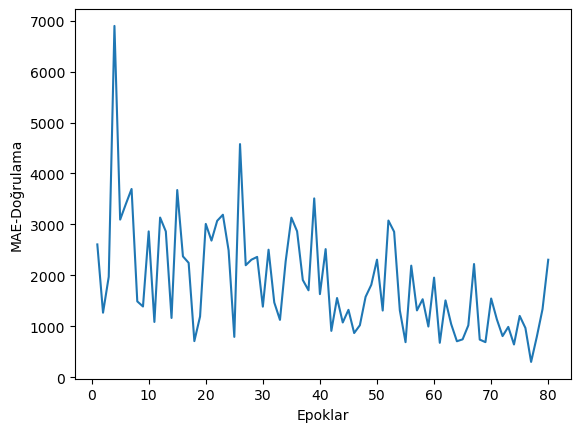

In [339]:
import matplotlib.pyplot as plt

average_mae_history =[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epoch)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epoklar')
plt.ylabel('MAE-Doğrulama')
plt.show()

[1083.8310852050781, 3134.333667755127, 2862.020195007324, 1162.2153701782227, 3674.266279220581, 2371.6979484558105, 2244.2799682617188, 707.6373405456543, 1191.2065124511719, 3009.297920227051, 2681.4356994628906, 3069.6805114746094, 3189.368362426758, 2490.055805206299, 790.5094375610352, 4576.714660644531, 2197.4619140625, 2306.5284118652344, 2361.13427734375, 1384.4845428466797, 2502.569595336914, 1466.869613647461, 1124.5397415161133, 2277.009506225586, 3132.0084533691406, 2864.61812210083, 1907.8973541259766, 1705.2843322753906, 3509.945022583008, 1630.401466369629, 2514.146743774414, 908.6982955932617, 1554.016471862793, 1073.5473937988281, 1321.6669445037842, 865.9466552734375, 1019.375617980957, 1576.8937149047852, 1813.5989151000977, 2306.6665954589844, 1307.9198150634766, 3075.418426513672, 2854.852783203125, 1310.7981185913086, 686.9002075195312, 2189.5426025390625, 1310.6020164489746, 1530.0106887817383, 993.9706115722656, 1954.0074291229248, 674.4627914428711, 1507.38269

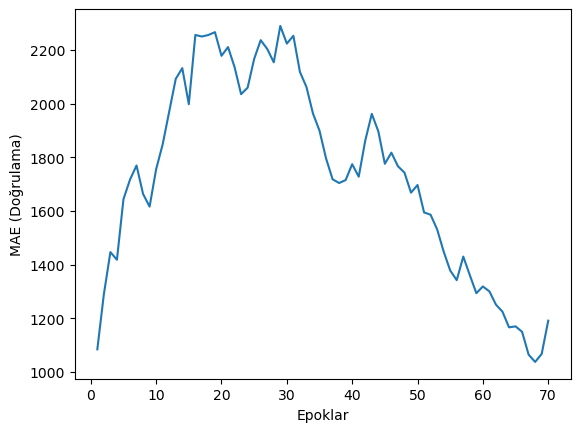

In [340]:
print(average_mae_history[10:])

def smooth_curve(points, factor=0.9):
    smoothed_points =[]
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+ 1), smooth_mae_history)
plt.xlabel('Epoklar')
plt.ylabel('MAE (Doğrulama)')
plt.show()

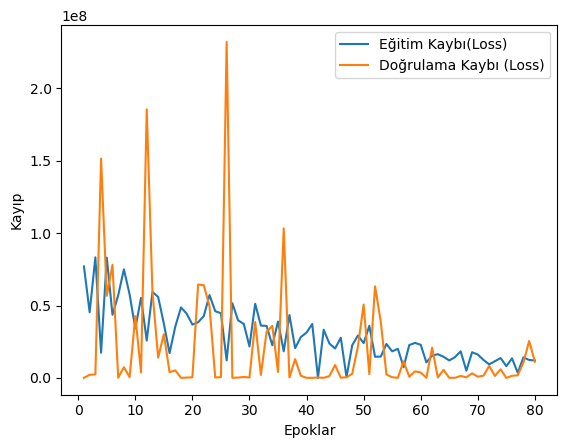

In [341]:
plt.plot(range(1, num_epoch + 1), history.history['loss'], label='Eğitim Kaybı(Loss)')
plt.plot(range(1, num_epoch + 1), history.history['val_loss'], label='Doğrulama Kaybı (Loss)')
plt.xlabel('Epoklar')
plt.ylabel('Kayıp')
plt.legend()
plt.show()